## Chi Square Test of Independence

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import chi2
from scipy.stats import chi2_contingency

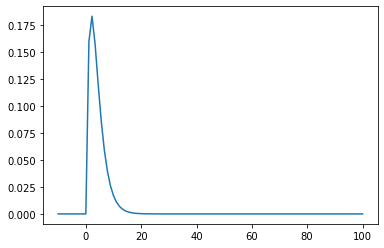

In [2]:
x_min = -10
x_max = 100

x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df=4)
plt.plot(x, y)

## Loading Data

In [4]:
data = pd.read_csv('./data/adult.txt',sep=',')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,=50K


### Ques- Is there a relationship between occupation and gender? (or does the preference of occupation depend on the gender)

In [5]:
data.gender.value_counts()

Male      30810
Female    15285
Name: gender, dtype: int64

In [6]:
data.occupation.value_counts()

Prof-specialty       5803
Craft-repair         5771
Exec-managerial      5726
Adm-clerical         5331
Sales                5208
Other-service        4656
Machine-op-inspct    2858
Transport-moving     2222
Handlers-cleaners    1945
Farming-fishing      1402
Tech-support         1367
Protective-serv       916
Priv-house-serv       236
Armed-Forces           14
Name: occupation, dtype: int64

### Understanding the Chi2 Test
Lets make a bold Claim that Gender and Occupation are dependent.

Step - 1:
i.e. Alternate Hypothesis:$$ H_1: They \ are \ Dependent $$and Null Hypothesis:$$ H_0: They \ are \ Independent $$

Step - 2:

Collect the sample of size n
Compute the sample frequencies
Step - 3: Compute $ \chi^2 $ test statistic
Now you need to check, if the difference in the observed and expected frequencies is too extreme to reject the NULL hypothesis.

Have a look at Observed Frequencies (in the sample)
Compute the Expected Frequencies (under null hyp assumption)$$ Expected \ Value = \frac{row \ total * col \ total}{grand \ total}$$Now, test statistic can be computed using below mentioned formula:$$ \chi^2 = \Sigma \frac{(o-e)^2}{e} $$
Step - 4: Decide $ \alpha $ and $ df = (rows-1)(cols-1) $

Step - 5: Apply decision rule

Chi Square Test$$ if \ \chi^2 &gt; \chi^2_{df, \alpha} \Rightarrow Reject H_0 $$
p-value Test$$ p \ value = (1.0 - cdf(test \ statistic)) $$Now,$$ if (p \ value &lt; \alpha) \Rightarrow Accept H_1 \ or \ Reject H_0 $$

In [7]:
# Step - 2 => Looking at the freqency distribution

pd.crosstab(data.occupation, data.gender, margins=True)

gender,Female,Male,All
occupation,,,
Adm-clerical,3572,1759,5331
Armed-Forces,0,14,14
Craft-repair,303,5468,5771
Exec-managerial,1638,4088,5726
Farming-fishing,92,1310,1402
Handlers-cleaners,239,1706,1945
Machine-op-inspct,758,2100,2858
Other-service,2557,2099,4656
Priv-house-serv,223,13,236


In [8]:
# These are the observed frequencies

observed = pd.crosstab(data.occupation, data.gender)

observed

gender,Female,Male
occupation,,
Adm-clerical,3572,1759
Armed-Forces,0,14
Craft-repair,303,5468
Exec-managerial,1638,4088
Farming-fishing,92,1310
Handlers-cleaners,239,1706
Machine-op-inspct,758,2100
Other-service,2557,2099
Priv-house-serv,223,13


In [9]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(observed)

(8236.510177831564,
 0.0,
 13,
 array([[1728.66461857, 3602.33538143],
        [   4.53973076,    9.46026924],
        [1871.3418709 , 3899.6581291 ],
        [1856.74987919, 3869.25012081],
        [ 454.62160856,  947.37839144],
        [ 630.6983086 , 1314.3016914 ],
        [ 926.75360718, 1931.24639282],
        [1509.78474284, 3146.21525716],
        [  76.52688989,  159.47311011],
        [1881.71839834, 3921.28160166],
        [ 297.02809803,  618.97190197],
        [1688.77984122, 3519.22015878],
        [ 443.27228167,  923.72771833],
        [ 720.52012427, 1501.47987573]]))

In [10]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df = chi2_contingency(observed)[2]

In [11]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, df)

chi2_critical

19.81192930712756

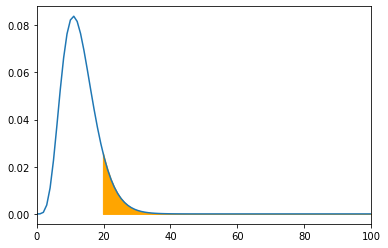

In [12]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df)
plt.fill_between(x1, y1, color='orange')

In [13]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [14]:

if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis
